In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from utils.analysis.population_analyses import *
from vip_helpers import *

paths_df = pd.read_parquet('paths_df.parquet')
days = paths_df['day']
#days = [day for day in days if day != 'p12']
dataclasses, state_dfs, s2p_outs, recording_days = load_animal_day_dict('Front_left')
dff_traces, spikes = {}, {}
state_dfs = {day:state_df for day, state_df in zip(days, state_dfs)}
s2p_outputs = {day:s2p_out for day, s2p_out in zip(days, s2p_outs)}
for day, s2p_out in zip(days, s2p_outs):
    dff_traces[day] = s2p_out.calc_deltaF()[0]
    spikes[day] = s2p_out.get_cell_spikes()

/home/gianna/Desktop/PythonProjects/VIPxTigerAnalyses/twop/getSuite2POutput.py:117: RuntimeWarning: invalid value encountered in divide
  deltaF = (rawF - baseline) / baseline


In [ ]:
pd.read_parquet('paths_df.parquet')

,day,Back_left_dataclass,Back_right_dataclass,Both_front_dataclass,Front_left_dataclass,Back_left_state_df,Back_right_state_df,Both_front_state_df,Front_left_state_df
0,p9,dataclasses/Back_left/Back_left_p9_dataclass.j...,dataclasses/Back_right/Back_right_p9_dataclass...,dataclasses/Both_front/Both_front_p9_dataclass...,dataclasses/Front_left/Front_left_p9_dataclass...,state_dfs/Back_left/Back_left_p9_state_df.parquet,state_dfs/Back_right/Back_right_p9_state_df.pa...,state_dfs/Both_front/Both_front_p9_state_df.pa...,state_dfs/Front_left/Front_left_p9_state_df.pa...
1,p10,dataclasses/Back_left/Back_left_p10_dataclass....,dataclasses/Back_right/Back_right_p10_dataclas...,dataclasses/Both_front/Both_front_p10_dataclas...,dataclasses/Front_left/Front_left_p10_dataclas...,state_dfs/Back_left/Back_left_p10_state_df.par...,state_dfs/Back_right/Back_right_p10_state_df.p...,state_dfs/Both_front/Both_front_p10_state_df.p...,state_dfs/Front_left/Front_left_p10_state_df.p...
3,p12,dataclasses/Back_left/Back_left_p12_spont_data...,None,dataclasses/Both_front/Both_front_p12_spont_da...,dataclasses/Front_left/Front_left_p12_spont_da...,state_dfs/Back_left/Back_left_p12_spont_state_...,None,state_dfs/Both_front/Both_front_p12_spont_stat...,state_dfs/Front_left/Front_left_p12_spont_stat...
4,p13,dataclasses/Back_left/Back_left_p13_dataclass....,dataclasses/Back_right/Back_right_p13_dataclas...,dataclasses/Both_front/Both_front_p13_dataclas...,dataclasses/Front_left/Front_left_p13_dataclas...,state_dfs/Back_left/Back_left_p13_state_df.par...,state_dfs/Back_right/Back_right_p13_state_df.p...,state_dfs/Both_front/Both_front_p13_state_df.p...,state_dfs/Front_left/Front_left_p13_state_df.p...
5,p14,dataclasses/Back_left/Back_left_p14_dataclass....,dataclasses/Back_right/Back_right_p14_dataclas...,dataclasses/Both_front/Both_front_p14_dataclas...,dataclasses/Front_left/Front_left_p14_dataclas...,state_dfs/Back_left/Back_left_p14_state_df.par...,state_dfs/Back_right/Back_right_p14_state_df.p...,state_dfs/Both_front/Both_front_p14_state_df.p...,state_dfs/Front_left/Front_left_p14_state_df.p...
6,p15,dataclasses/Back_left/Back_left_p15_dataclass....,dataclasses/Back_right/Back_right_p15_dataclas...,dataclasses/Both_front/Both_front_p15_dataclas...,dataclasses/Front_left/Front_left_p15_dataclas...,state_dfs/Back_left/Back_left_p15_state_df.par...,state_dfs/Back_right/Back_right_p15_state_df.p...,state_dfs/Both_front/Both_front_p15_state_df.p...,state_dfs/Front_left/Front_left_p15_state_df.p...
7,p16,dataclasses/Back_left/Back_left_p16_spont_data...,dataclasses/Back_right/Back_right_p16_spont_da...,dataclasses/Both_front/Both_front_p16_spont_da...,dataclasses/Front_left/Front_left_p16_spont_da...,state_dfs/Back_left/Back_left_p16_spont_state_...,state_dfs/Back_right/Back_right_p16_spont_stat...,state_dfs/Both_front/Both_front_p16_spont_stat...,state_dfs/Front_left/Front_left_p16_spont_stat...
8,p17,dataclasses/Back_left/Back_left_p17_dataclass....,dataclasses/Back_right/Back_right_p17_dataclas...,dataclasses/Both_front/Both_front_p17_dataclas...,dataclasses/Front_left/Front_left_p17_dataclas...,state_dfs/Back_left/Back_left_p17_state_df.par...,state_dfs/Back_right/Back_right_p17_state_df.p...,state_dfs/Both_front/Both_front_p17_state_df.p...,state_dfs/Front_left/Front_left_p17_state_df.p...
10,p19,dataclasses/Back_left/Back_left_p19_dataclass....,dataclasses/Back_right/Back_right_p19_dataclas...,dataclasses/Both_front/Both_front_p19_spont_da...,dataclasses/Front_left/Front_left_p19_dataclas...,state_dfs/Back_left/Back_left_p19_state_df.par...,state_dfs/Back_right/Back_right_p19_state_df.p...,state_dfs/Both_front/Both_front_p19_spont_stat...,state_dfs/Front_left/Front_left_p19_state_df.p...


### FIGURE 2A: example raster + mean population activity for one pup early vs late.


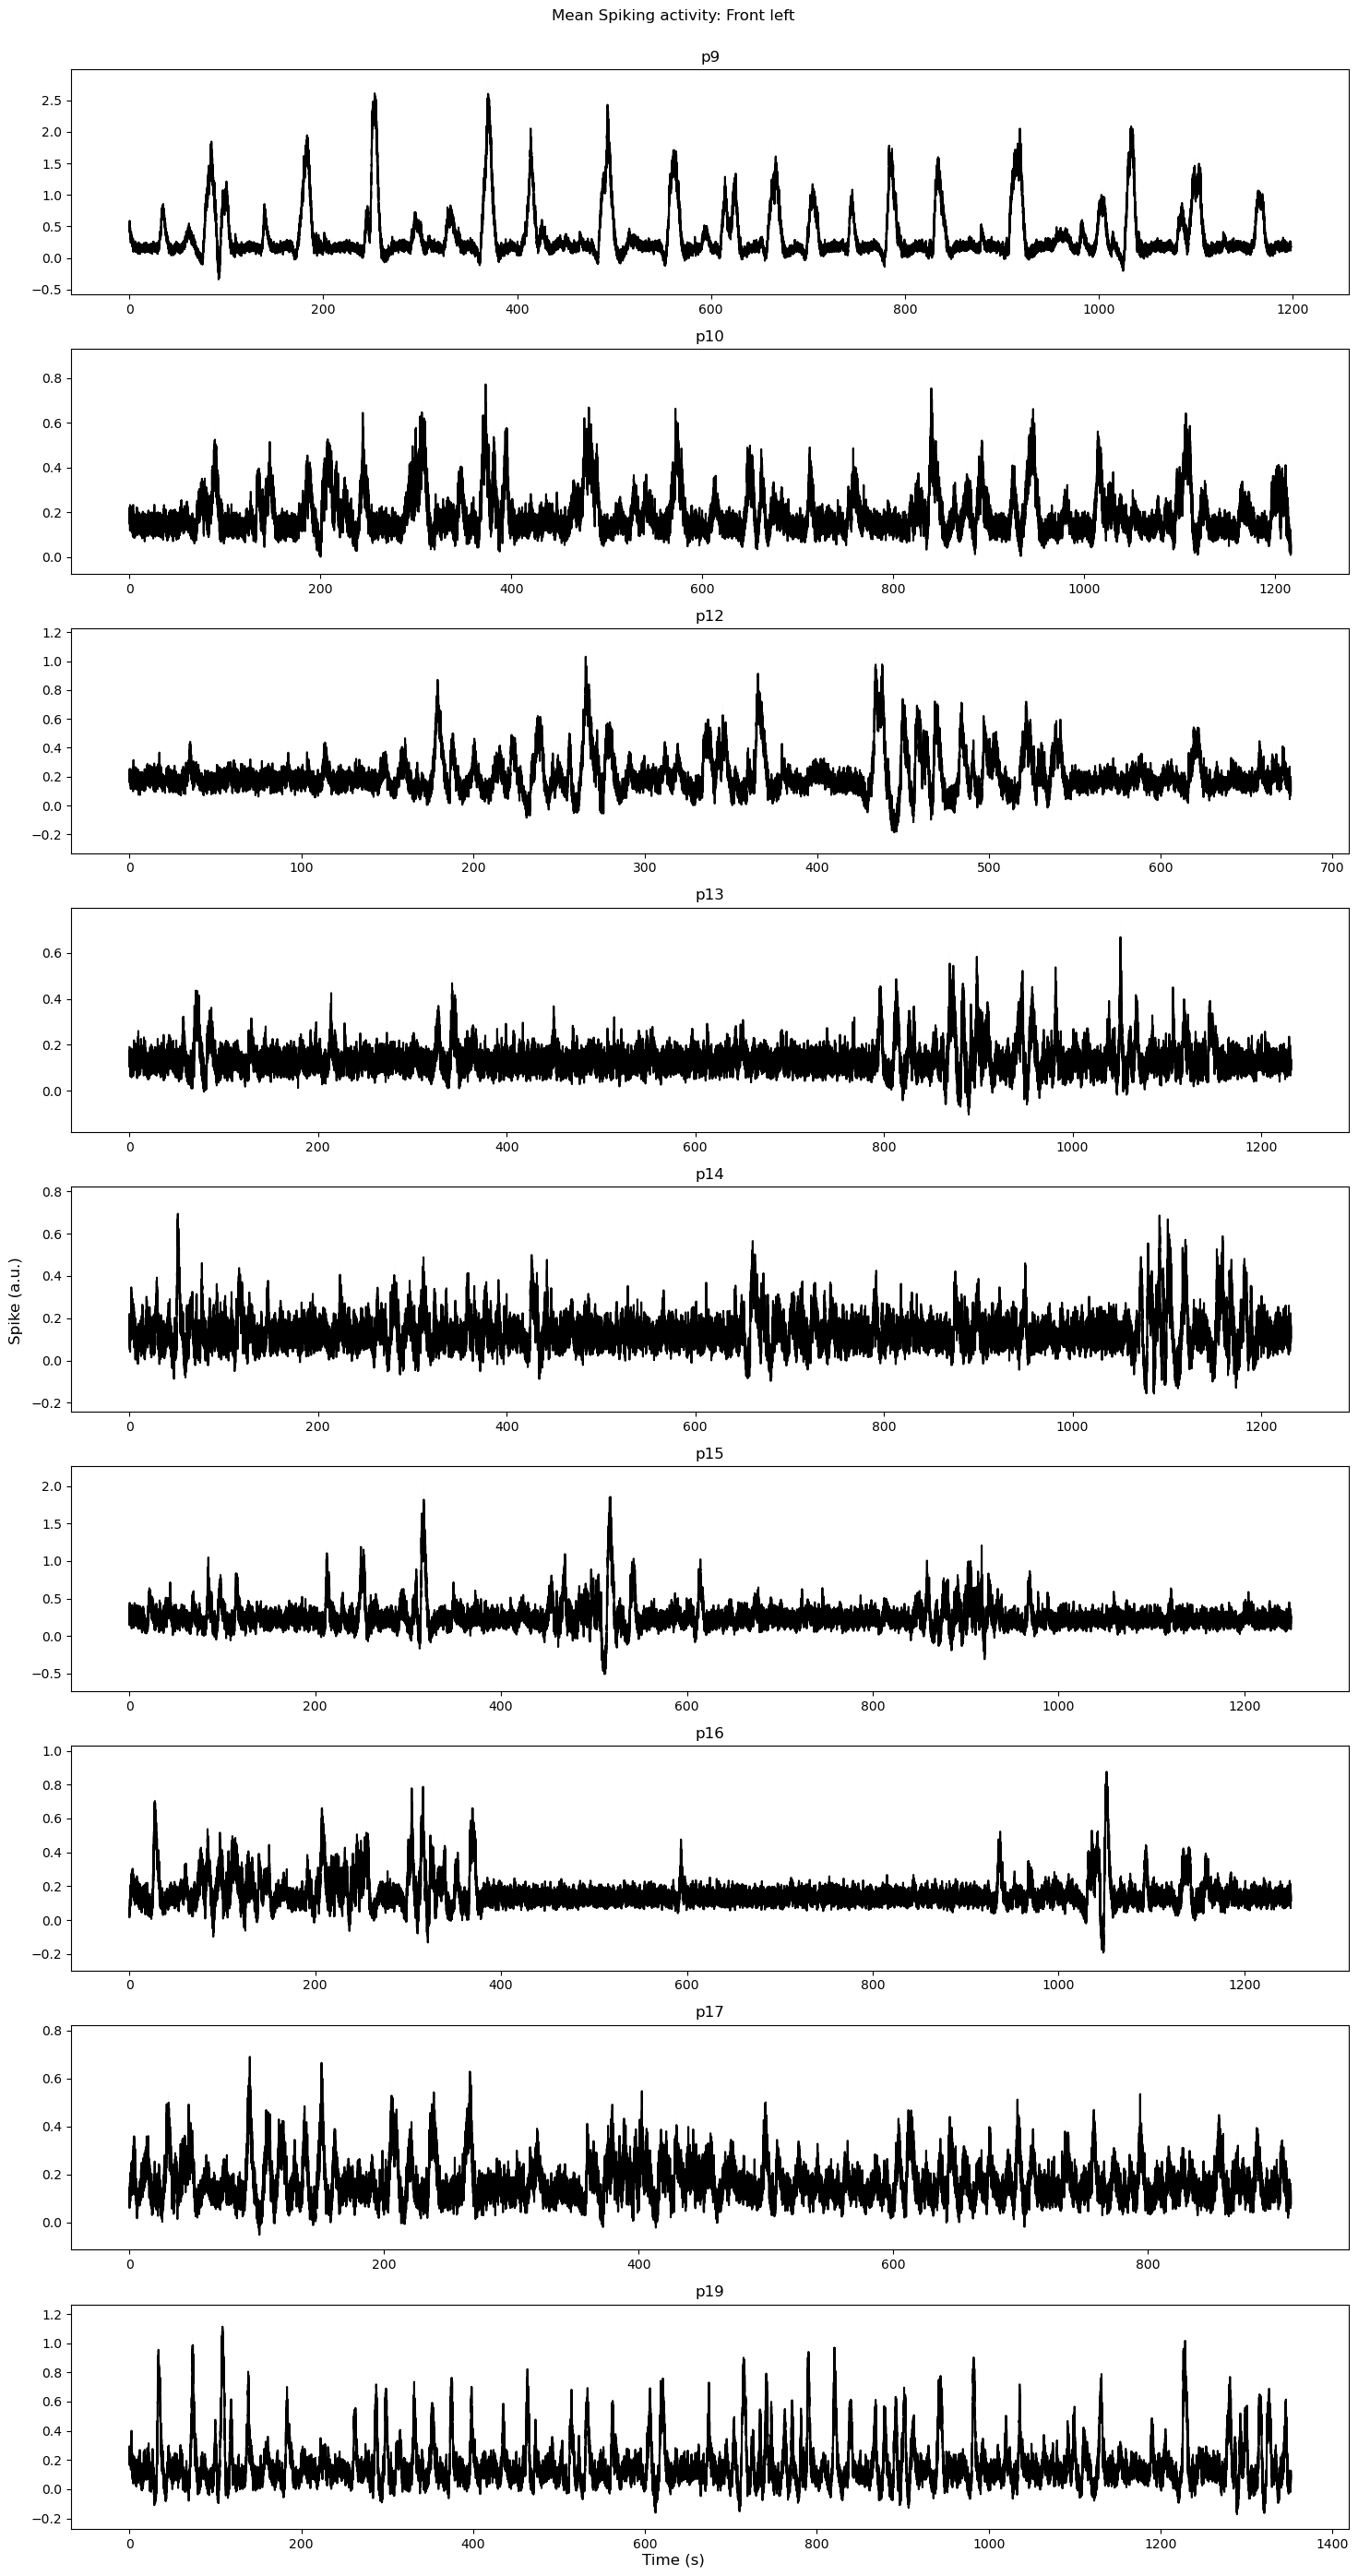

In [2]:
fig, axs = plt.subplots(len(days), 1, figsize=(15, 28))
axs_idx = 0
for day, trace in dff_traces.items():
    plot_population_mean(trace, t = np.arange(trace.shape[1]) / s2p_outputs[day].scope_fs,
                         axs = axs[axs_idx], title = day)
    axs_idx += 1
fig.supylabel('Spike (a.u.)')
fig.supxlabel('Time (s)')
plt.suptitle('Mean Spiking activity: Front left', y=1.0)
plt.tight_layout()

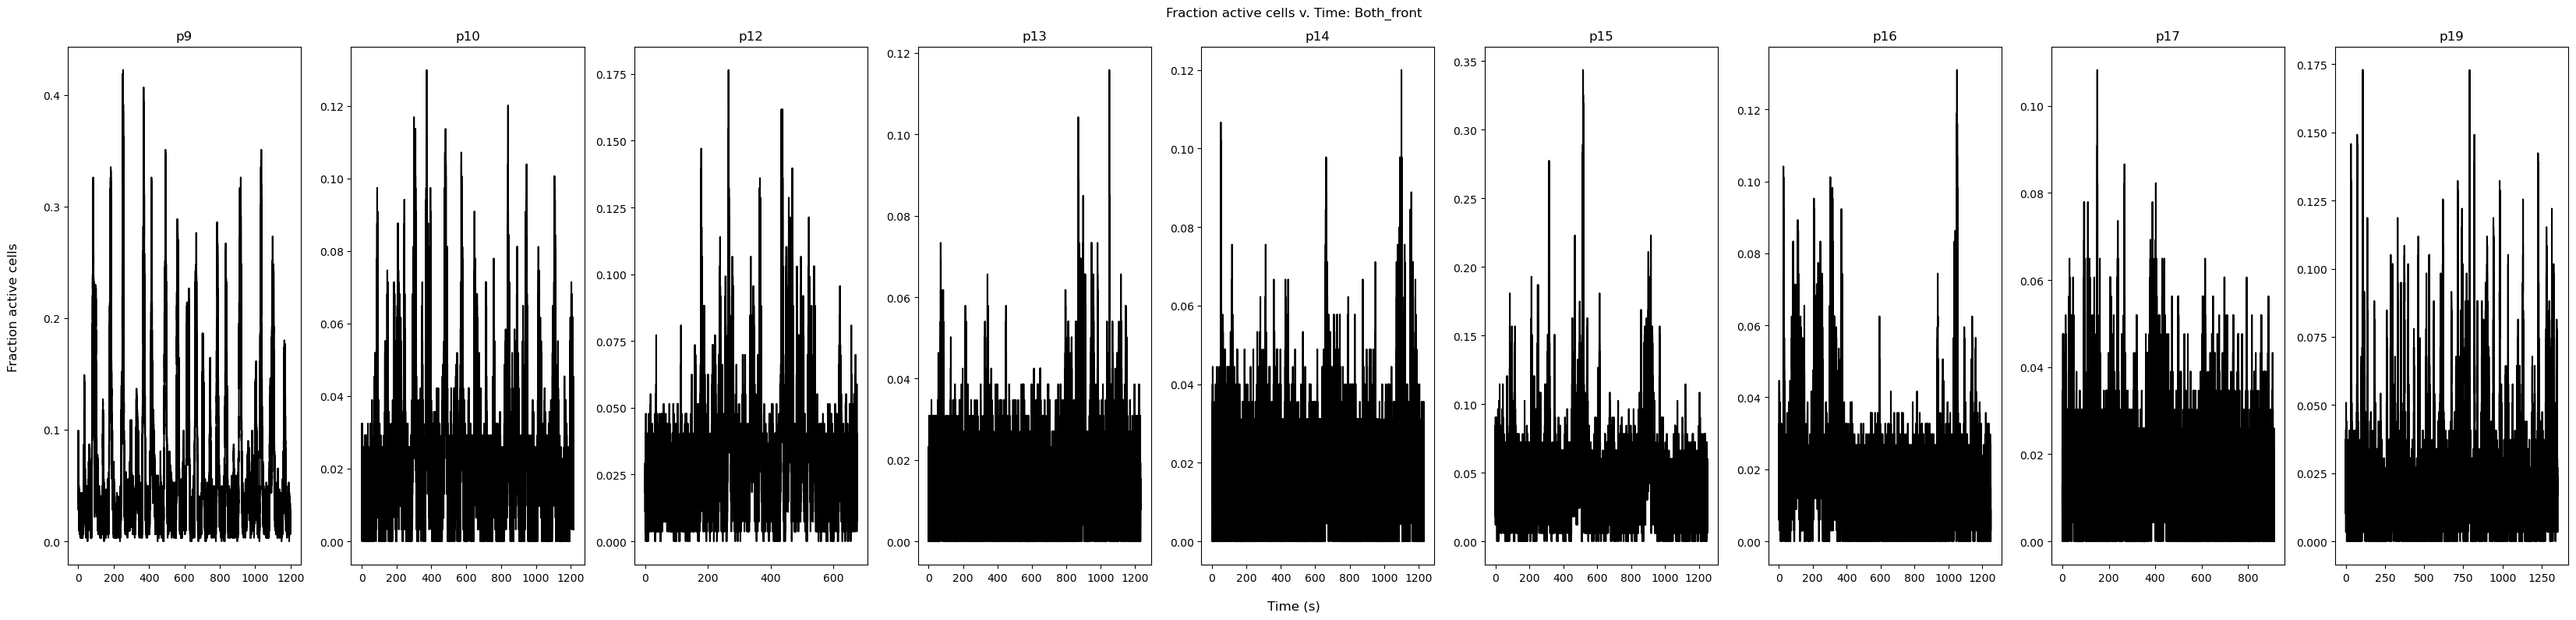

In [3]:
fig, axs = plt.subplots(1, len(days), figsize=(33, 8))
axs_idx = 0
for day, trace in dff_traces.items():
    plot_fraction_active(trace, t = np.arange(trace.shape[1]) / s2p_outputs[day].scope_fs,
                         fs=s2p_outputs[day].scope_fs, axs = axs[axs_idx], title = day)
    axs_idx += 1
fig.supylabel('Fraction active cells', x = 0)
fig.supxlabel('Time (s)')
plt.suptitle('Fraction active cells v. Time: Both_front')
plt.tight_layout()

In [4]:
synchrony_metrics_df = pd.DataFrame({'mean_frac_active': [], 'event_rate_per_min': [], 'median_pairwise_corr': []})
for day in days:
    recording_row = compute_synchrony_metrics(dff_traces[day], fs=s2p_outputs[day].scope_fs)
    recording_row = {metric_name:[value] for metric_name, value in recording_row.items()}
    synchrony_metrics_df = pd.concat([synchrony_metrics_df, pd.DataFrame(recording_row, index=[day])], axis=0)
synchrony_metrics_df

,mean_frac_active,event_rate_per_min,median_pairwise_corr
p9,0.196997,42.210415,0.069407
p10,0.220817,96.035775,0.008825
p12,0.197503,77.065380,0.024045
p13,0.200077,98.508561,0.011439
p14,0.113063,10.620606,0.018127
p15,0.173259,56.006538,0.027367
p16,0.219341,98.767314,0.018851
p17,0.208570,83.655200,0.024605
p19,0.169878,36.268673,0.057916


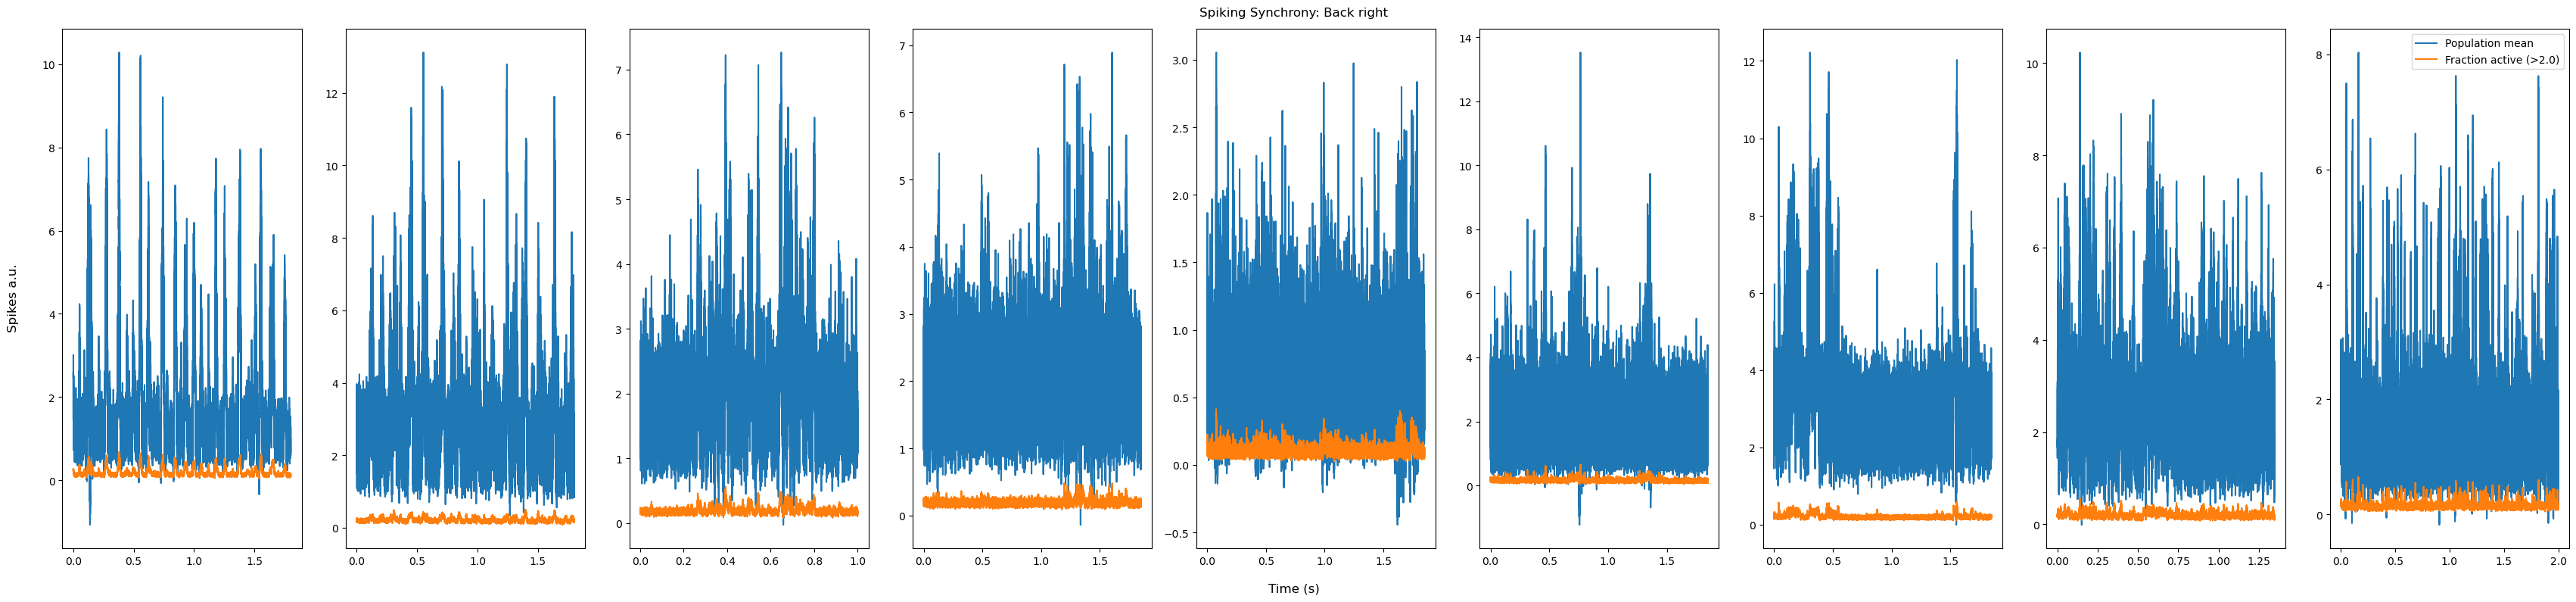

In [5]:
fig, axs = plt.subplots(1, len(days), figsize=(34, 8))
axs_idx = 0
for day, trace in dff_traces.items():
    plot_synchrony(dff_traces[day], t = np.arange(dff_traces[day].shape[1]) / 20e3, axs = axs[axs_idx])
    axs_idx += 1
plt.legend()
fig.supxlabel('Time (s)', x=0.5)
fig.supylabel('Spikes a.u.', x=0)
plt.suptitle('Spiking Synchrony: Back right')
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'IEI distribution: Front_left')

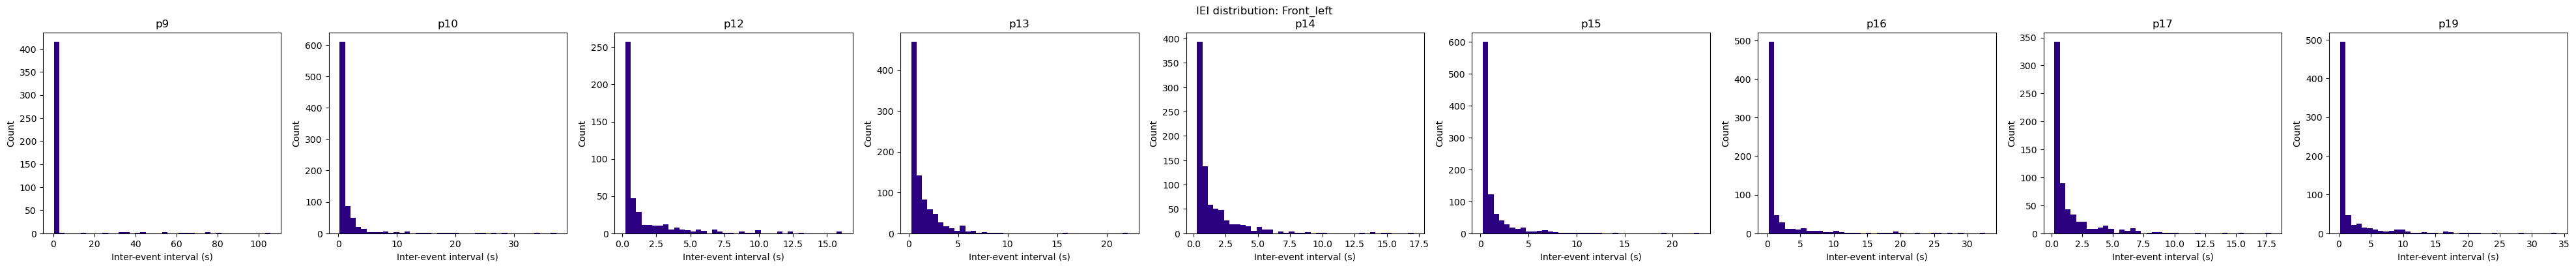

In [10]:
from utils.analysis.network_events import *

fig, axs = plt.subplots(1, len(days), figsize = (50,4))
axs_idx = 0
for day in days:
    day_spikes = spikes[day]
    fs = s2p_outputs[day].scope_fs
    network_results = analyze_network_synchrony(day_spikes, fs)
    ax_to_plot = axs[axs_idx]
    #summarize_network_metrics(network_results)
    plot_iei_histogram(network_results, axs= ax_to_plot, title=day, color="#2D0081")
    axs_idx += 1
plt.suptitle('IEI distribution: Front_left')
#plt.tight_layout()
# plot_participation_histogram(network_results, axs= ax_to_plot)
# plot_fraction_active(network_results, fs, axs= ax_to_plot)

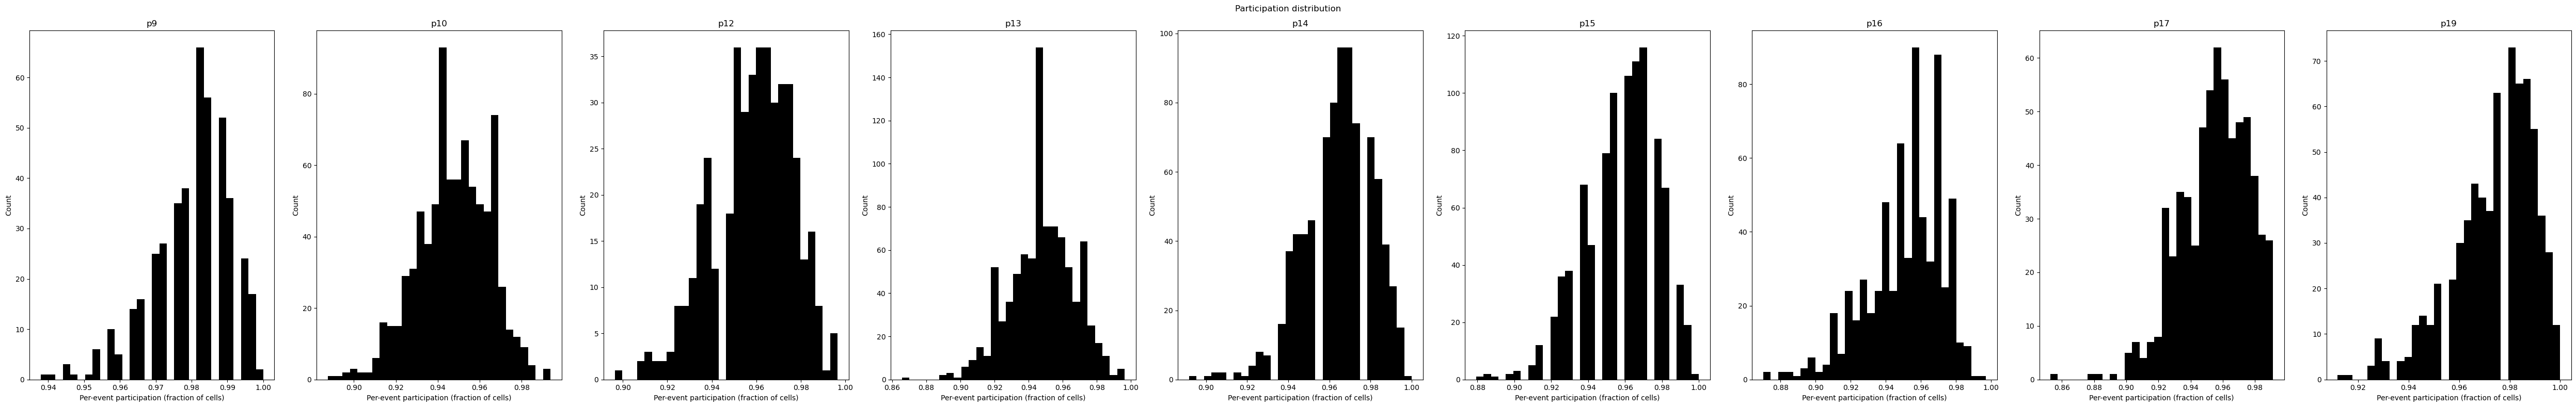

In [9]:
fig, axs = plt.subplots(1, len(days), figsize = (50,8))
axs_idx = 0
for day in days:
    day_spikes = spikes[day]
    fs = s2p_outputs[day].scope_fs
    network_results = analyze_network_synchrony(day_spikes, fs)
    ax_to_plot = axs[axs_idx]
    #summarize_network_metrics(network_results)
    plot_participation_histogram(network_results, axs= ax_to_plot, title=day, color='black')
    axs_idx += 1
plt.suptitle('Participation distribution')
plt.tight_layout()

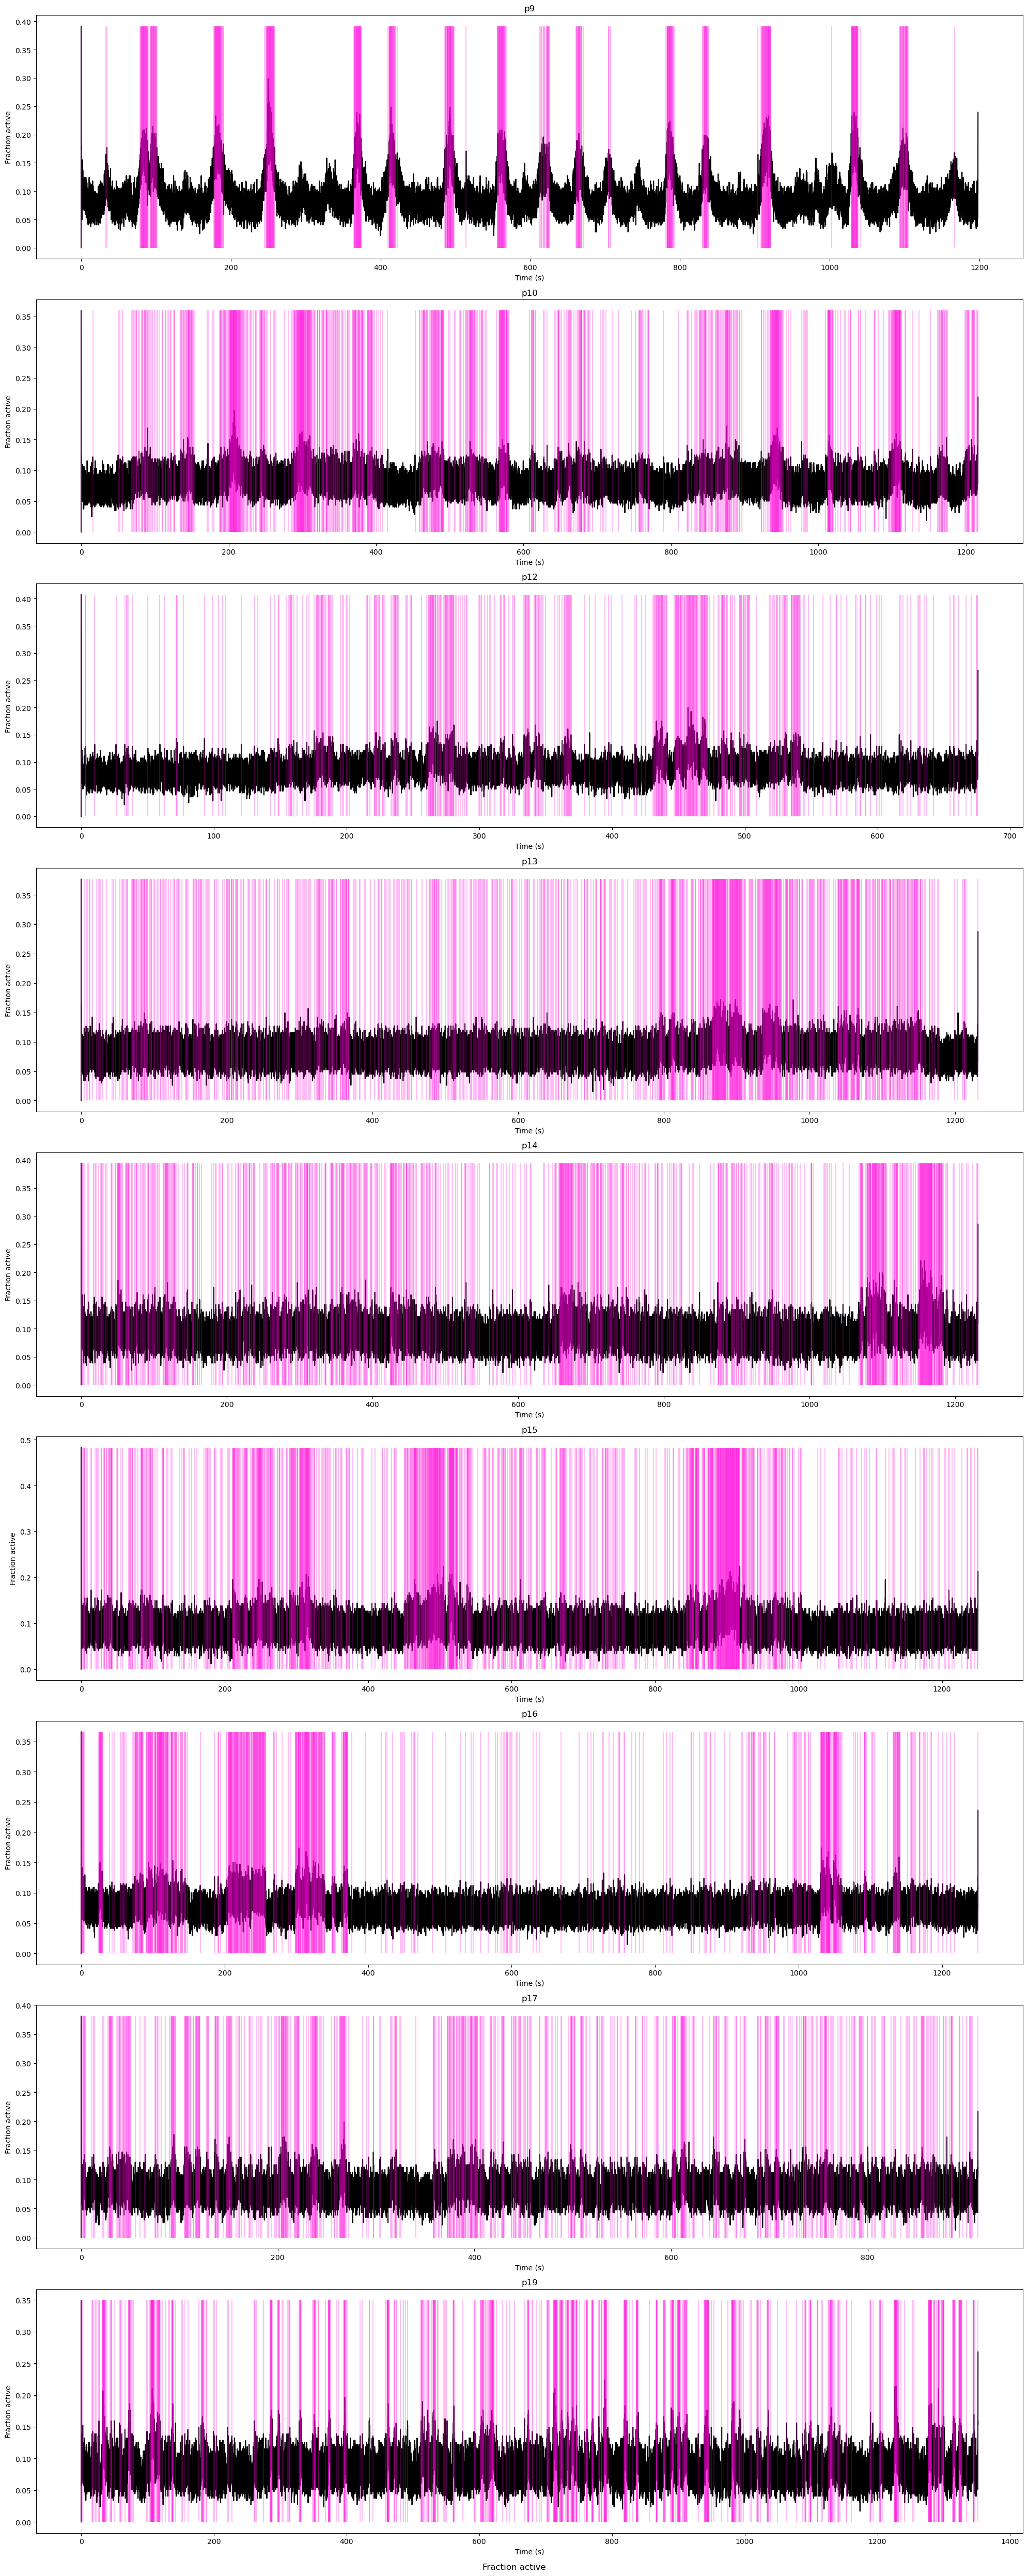

In [11]:
from utils.analysis.network_events import *

fig, axs = plt.subplots(len(days), 1, figsize = (20, 50))
axs_idx = 0
for day in days:
    day_spikes = spikes[day]
    fs = s2p_outputs[day].scope_fs
    network_results = analyze_network_synchrony(day_spikes, fs)
    ax_to_plot = axs[axs_idx]
    #summarize_network_metrics(network_results)
    plot_fraction_active_trace(network_results, fs, axs= ax_to_plot, title=day, vline_color='#FF00DD')
    axs_idx += 1
plt.suptitle('Fraction active', y=0)
plt.tight_layout()